In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

# Load Dataset and Minimal Cleaning

In [379]:
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [380]:
old_df = pd.read_csv("/Users/sky/src/HowlandLab/data/target_grid_search.csv")
df = old_df.copy(deep = True)
df = df.dropna()
df

,Unnamed: 0,marker,nx,ny,filter,filterFactor,useCorrection,CT_prime,turbulence,mean_CT,...,variance_Cp,std_CT,std_an,std_Cp,skewness_CT,skewness_an,skewness_Cp,kurtosis_CT,kurtosis_an,kurtosis_Cp
0,0,o,64.0,32.0,0.589831,1.000,True,1.0,False,0.653387,...,3.197882e-12,1.472572e-06,9.108791e-07,1.785475e-06,3.114115,-3.114112,3.114117,9.390863,9.390842,9.390885
1,1,o,128.0,64.0,0.294915,1.000,True,1.0,False,0.669815,...,7.861220e-12,2.282117e-06,1.394218e-06,2.801602e-06,-0.121881,0.121894,-0.121868,3.161778,3.161781,3.161775
2,2,o,256.0,128.0,0.147458,1.000,True,1.0,False,0.644266,...,6.806981e-13,6.849901e-07,4.266991e-07,8.247230e-07,-0.367102,0.367104,-0.367100,0.398371,0.398372,0.398369
3,3,o,64.0,32.0,0.080000,0.136,True,1.0,False,0.703096,...,1.359172e-11,2.926576e-06,1.745104e-06,3.680949e-06,2.864592,-2.864584,2.864601,8.871645,8.871581,8.871710
4,4,o,128.0,64.0,0.080000,0.271,True,1.0,False,0.688967,...,3.867314e-10,1.578250e-05,9.507068e-06,1.965017e-05,-0.071558,0.071595,-0.071521,0.155124,0.155125,0.155123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,s,320.0,128.0,0.135316,1.000,False,4.0,True,1.249208,...,1.238097e+00,1.239069e+00,3.402335e-01,1.112600e+00,0.493413,0.024575,0.777154,-1.329415,-1.502568,-0.951684
99,99,^,320.0,128.0,0.135316,1.000,False,4.0,True,1.146497,...,1.169972e-03,4.250885e-02,9.911081e-03,3.420182e-02,0.213703,-0.162289,0.265402,-0.089651,-0.122687,-0.047746
100,100,o,320.0,128.0,0.202975,1.500,True,4.0,True,1.108617,...,7.663706e-04,3.499613e-02,8.299133e-03,2.767951e-02,0.208263,-0.165468,0.251221,-0.137456,-0.162679,-0.105950
101,101,s,320.0,128.0,0.202975,1.500,True,4.0,True,1.207949,...,1.020431e+00,1.154096e+00,3.108400e-01,1.010075e+00,0.457287,0.014188,0.737714,-1.358471,-1.502180,-1.025976


In [381]:
old_df = pd.read_csv("/Users/sky/src/HowlandLab/data/target_grid_search.csv")
df = old_df.copy(deep = True)
df = df.dropna()
# add in new columns of ease of use
df['Movement'] = df.apply(lambda row: ("Stationary" if row.marker == "o" else ("Surging" if row.marker == "s" else "Pitching")), axis = 1)
df["Resolution (ny)"] = df["ny"].astype(str)
df["h"] = df.apply(lambda row: round(math.sqrt((25/row.nx)**2 + 2 * (10/row.ny)**2), ndigits = 2), axis = 1)
df["f"] = df.apply(lambda row: math.trunc(row.filterFactor*10) / 10, axis = 1)
# remove unneeded columns/values
cols_to_keep = ["Movement", "Resolution (ny)", "filterFactor", "f", "useCorrection", "turbulence", "CT_prime"]
df = df.drop_duplicates(subset = cols_to_keep, keep = 'last')

In [382]:
def get_movement(df, type_str):
    return df[df["Movement"] == type_str]
def get_stationary(df):
    return get_movement(df, "Stationary")
def get_surging(df):
    return get_movement(df, "Surging")
def get_pitching(df):
    return get_movement(df, "Pitching")

In [383]:
def get_mean(df):
    return df[cols_to_keep + ["mean_CT", "mean_an", "mean_Cp"]]
def get_std(df):
    return df[cols_to_keep + ["std_CT", "std_an", "std_Cp"]]
def get_skew(df):
    return df[cols_to_keep + ["skewness_CT", "skewness_an", "skewness_Cp"]]
def get_kurtosis(df):
    return df[cols_to_keep + ["kurtosis_CT", "kurtosis_an", "kurtosis_Cp"]]

In [384]:
mean_df = get_mean(df)
std_df = get_std(df)
skew_df = get_skew(df)
kurtosis_df = get_kurtosis(df)

# Plot Dataset Basics

In [385]:
def analytical_a(CT):
    # note that CT is actually CT'
    return CT / (4 + CT)

def a_to_Cp(a, alg = "classical"):
    return 4 * a * (1 - a)**2

In [386]:
def four_plot_layout(df, CT_key, an_key, Cp_key, add_classical = True, title = "", ax_label_type = "", fill_between = False, **kwargs):
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    ((ax0, ax1), (ax2, ax3)) = axes

    sns.scatterplot(ax = ax0, data = df, x = an_key, y = CT_key, legend = True, **kwargs)
    sns.scatterplot(ax = ax1, data = df, x = "CT_prime", y = CT_key, legend = False, **kwargs)
    sns.scatterplot(ax = ax2, data = df, x = an_key, y = Cp_key, legend = False, **kwargs)
    sns.scatterplot(ax = ax3, data = df, x = "CT_prime", y = Cp_key, legend = False, **kwargs)

    if add_classical:
        # classical momentum values for statinary turbine
        ctp_vals = np.linspace(0.75, 6.25, 50)
        classical_an = [analytical_a(ctp) for ctp in ctp_vals]
        classical_cp = [a_to_Cp(a) for a in classical_an]
        classical_ct = [ctp * (1 - classical_an[i])**2 for (i, ctp) in enumerate(ctp_vals)]
        sns.lineplot(ax = ax0, x = classical_an, y = classical_ct, color = 'k')
        sns.lineplot(ax = ax1, x = ctp_vals, y = classical_ct, color = 'k')
        sns.lineplot(ax = ax2, x = classical_an, y = classical_cp, color = 'k')
        sns.lineplot(ax = ax3, x = ctp_vals, y = classical_cp, color = 'k')

    if fill_between:
        mean_of_ct_vals = df.groupby('CT_prime')[CT_key].mean()
        std_of_ct_vals = df.groupby('CT_prime')[CT_key].std()
        ax1.fill_between(mean_of_ct_vals.index, mean_of_ct_vals + std_of_ct_vals, mean_of_ct_vals - std_of_ct_vals, color='grey', alpha=0.2)
        mean_of_cp_vals = df.groupby('CT_prime')[Cp_key].mean()
        std_of_cp_vals = df.groupby('CT_prime')[Cp_key].std()
        ax3.fill_between(mean_of_cp_vals.index, mean_of_cp_vals + std_of_cp_vals, mean_of_cp_vals - std_of_cp_vals, color='grey', alpha=0.2)


    fig.suptitle(title)
    ax0.set(xlabel = "", ylabel=ax_label_type + ' $C_T$')
    ax1.set(xlabel = "", ylabel = "")
    ax2.set(ylabel= ax_label_type + ' $C_p$', xlabel= ax_label_type + ' $a_n$')
    ax3.set(xlabel= '$C_T\'$', ylabel = "")
    return fig, axes

# Plot All Data

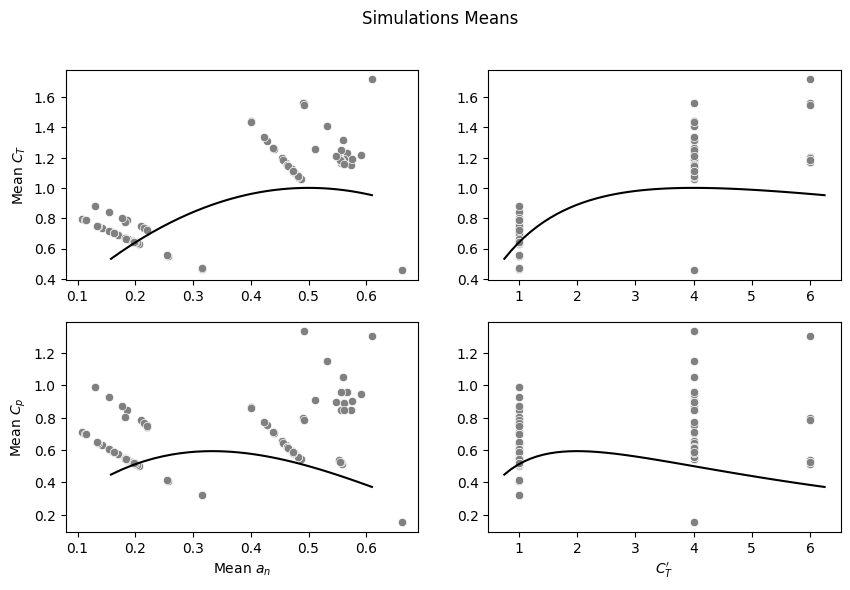

In [387]:
four_plot_layout(df, "mean_CT", "mean_an", "mean_Cp", color ="grey", title = "Simulations Means", ax_label_type = "Mean");

# Plot Data by Movement

In [388]:
palette = "viridis_r"
alpha = 0.7

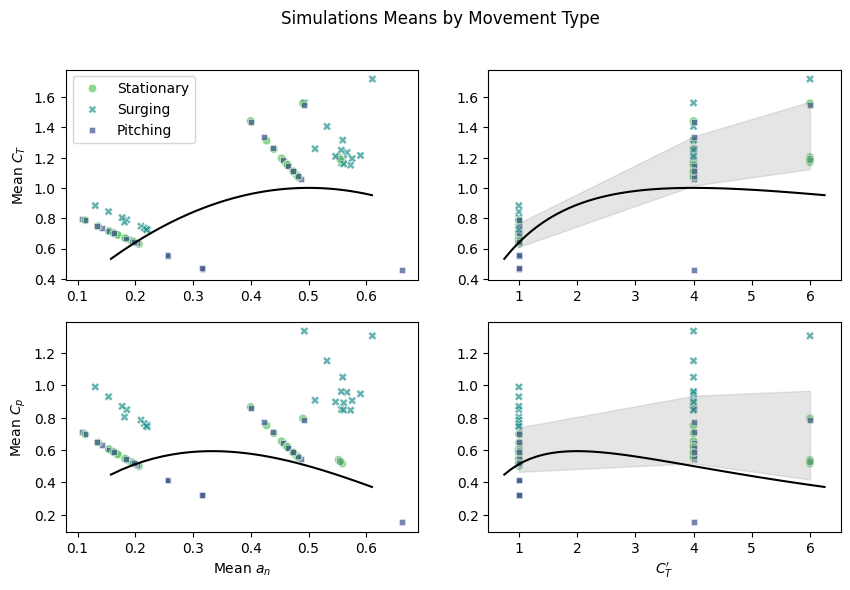

In [389]:
four_plot_layout(df, "mean_CT", "mean_an", "mean_Cp", color ="grey", title = "Simulations Means by Movement Type", ax_label_type = "Mean", hue = "Movement", style = "Movement", palette = palette, alpha = alpha, fill_between= True);

## Plot Data by Resolution

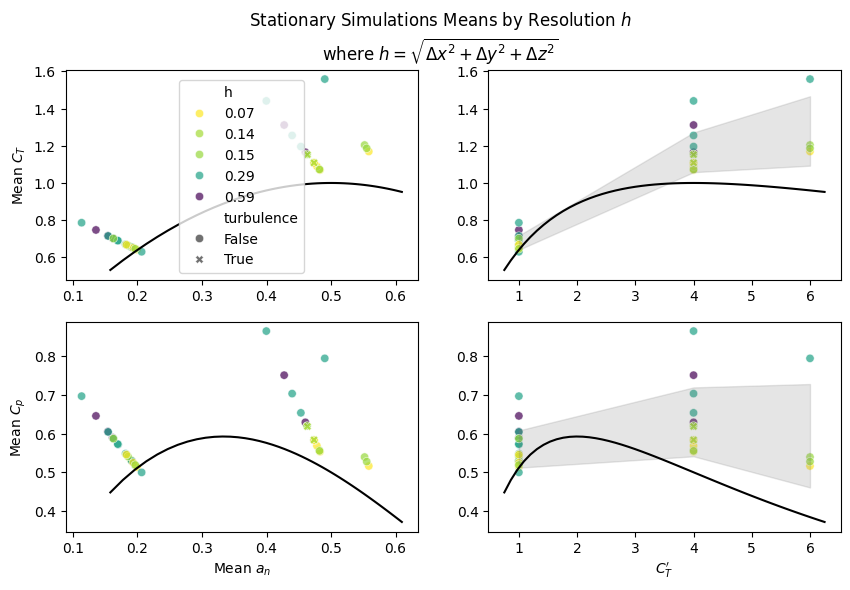

In [390]:
four_plot_layout(get_stationary(df), "mean_CT", "mean_an", "mean_Cp", title =  "Stationary Simulations Means by Resolution $h$\nwhere $h = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}$", ax_label_type = "Mean", hue = "h", style = "turbulence", palette = palette, alpha = alpha, fill_between=True);

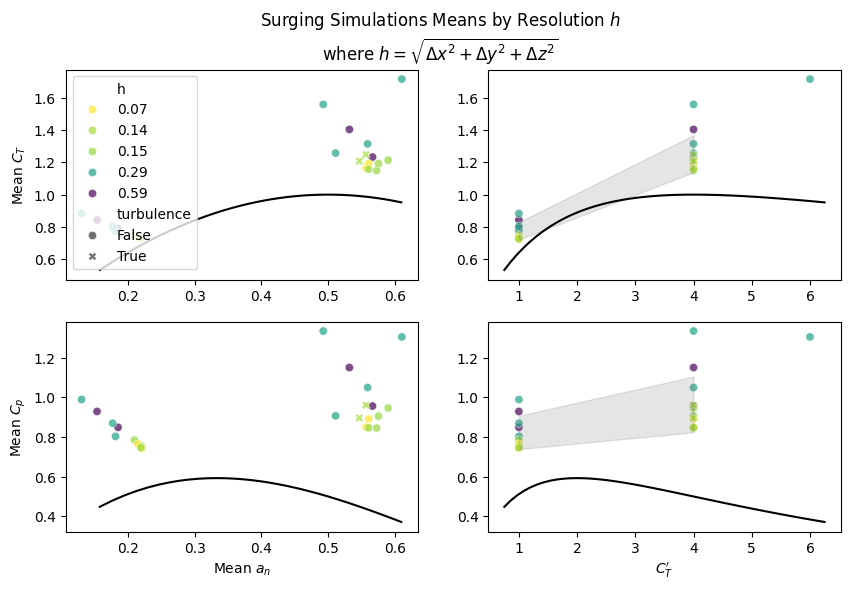

In [391]:
four_plot_layout(get_surging(df), "mean_CT", "mean_an", "mean_Cp", title =  "Surging Simulations Means by Resolution $h$\nwhere $h = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}$", ax_label_type = "Mean", hue = "h", style = "turbulence", palette = palette, alpha = alpha, fill_between=True);

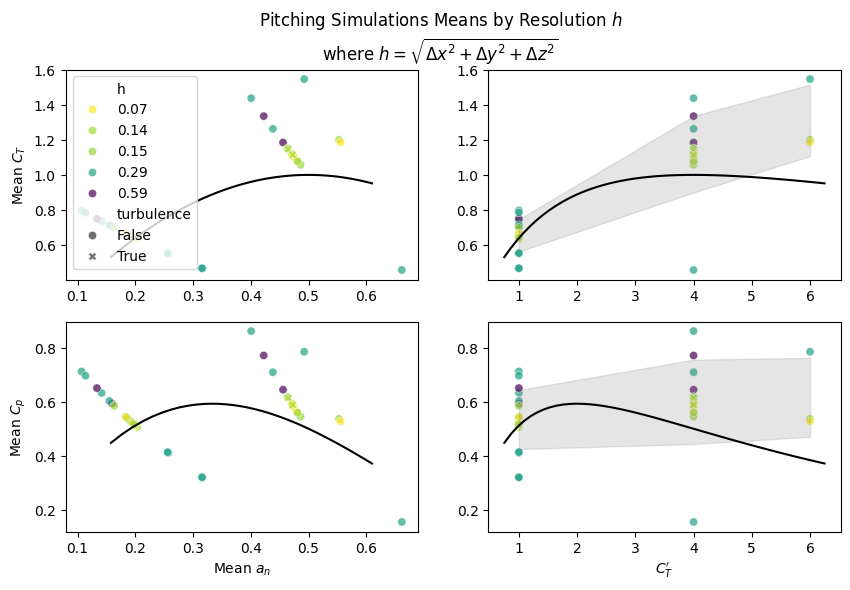

In [392]:
four_plot_layout(get_pitching(df), "mean_CT", "mean_an", "mean_Cp", title =  "Pitching Simulations Means by Resolution $h$\nwhere $h = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}$", ax_label_type = "Mean", hue = "h", style = "turbulence", palette = palette, alpha = alpha, fill_between=True);

At this point, I feel it is safe to drop the two coarsest resolutions, as they fall outside of the standard deviation of the means of $C_p$ and $C_T$. Thus we only keep resolutions that are $h < 0.25$.

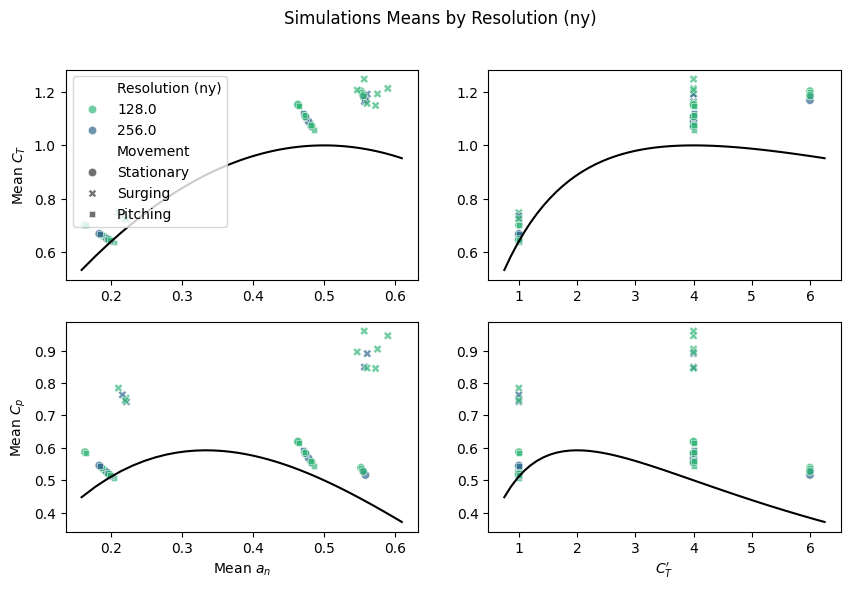

In [393]:
high_res_df = df[df["h"] < 0.25]
four_plot_layout(high_res_df, "mean_CT", "mean_an", "mean_Cp", title = "Simulations Means by Resolution (ny)", ax_label_type = "Mean", hue = "Resolution (ny)", style = "Movement", alpha = alpha, palette = palette);

# Plot Data by Filter Factor

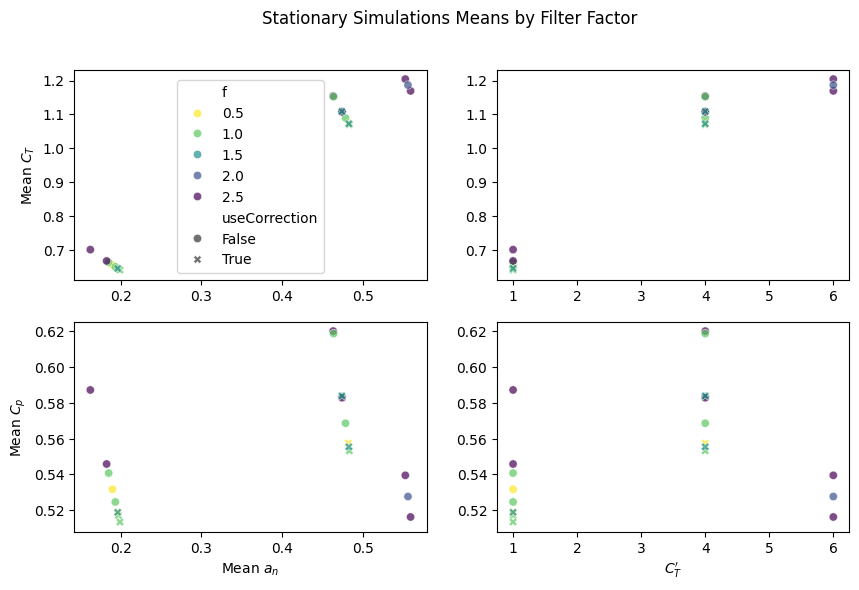

In [394]:
four_plot_layout(get_stationary(high_res_df), "mean_CT", "mean_an", "mean_Cp", title =  "Stationary Simulations Means by Filter Factor", ax_label_type = "Mean", hue = "f", style = "useCorrection", palette = palette, alpha = alpha, add_classical = False);

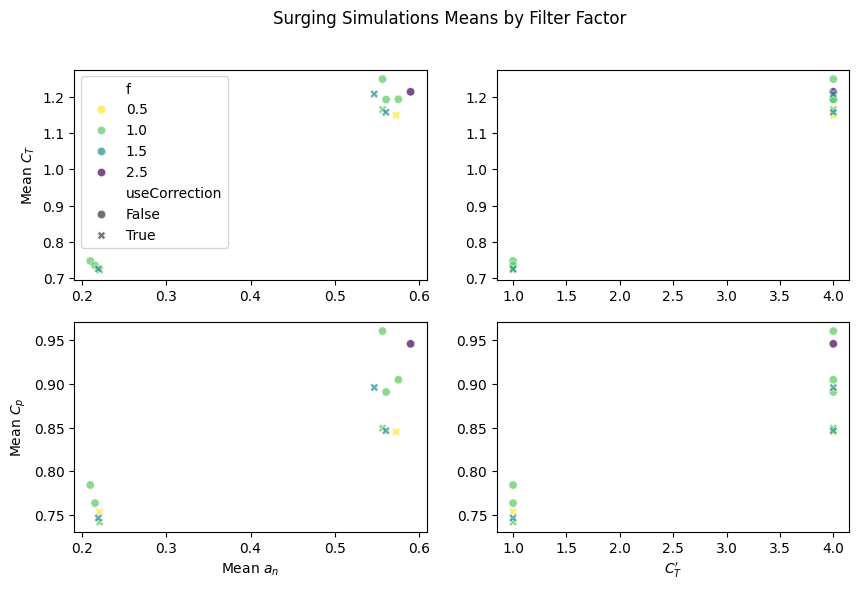

In [395]:
four_plot_layout(get_surging(high_res_df), "mean_CT", "mean_an", "mean_Cp", title =  "Surging Simulations Means by Filter Factor", ax_label_type = "Mean", hue = "f", style = "useCorrection", palette = palette, alpha = alpha, add_classical = False);

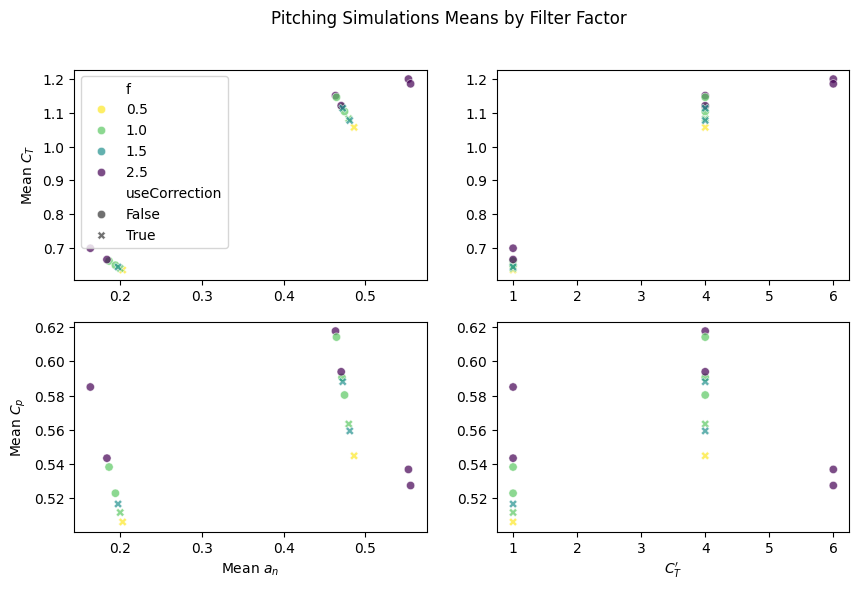

In [396]:
four_plot_layout(get_pitching(high_res_df), "mean_CT", "mean_an", "mean_Cp", title =  "Pitching Simulations Means by Filter Factor", ax_label_type = "Mean", hue = "f", style = "useCorrection", palette = palette, alpha = alpha, add_classical = False);

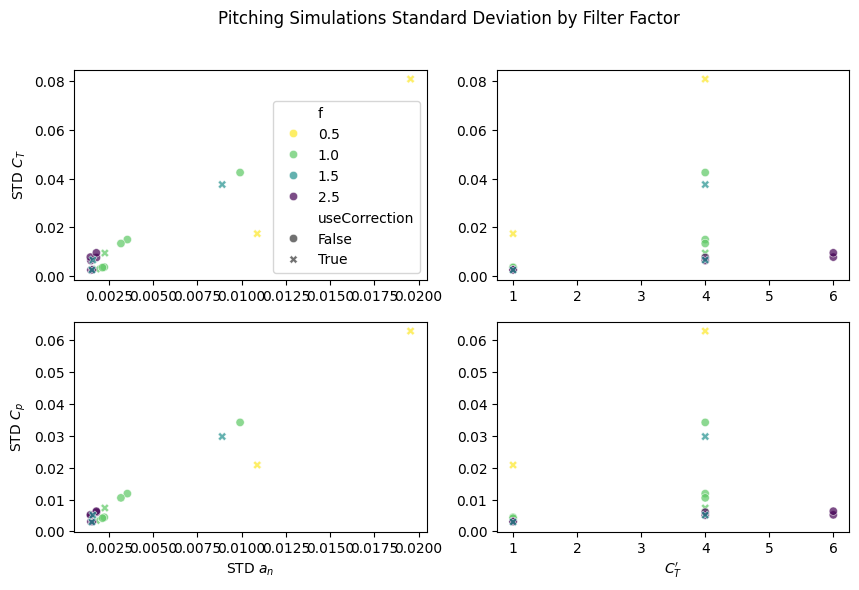

In [397]:
four_plot_layout(get_pitching(high_res_df), "std_CT", "std_an", "std_Cp", title =  "Pitching Simulations Standard Deviation by Filter Factor", ax_label_type = "STD", hue = "f", style = "useCorrection", palette = palette, alpha = alpha, add_classical = False);

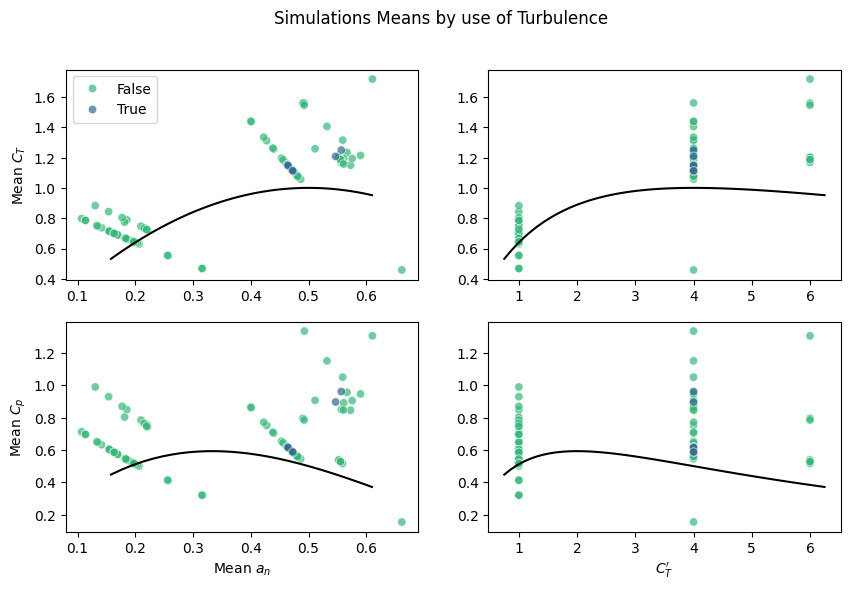

In [398]:
four_plot_layout(df, "mean_CT", "mean_an", "mean_Cp",  title = "Simulations Means by use of Turbulence", ax_label_type = "Mean", hue = "turbulence", palette = palette, alpha = alpha);

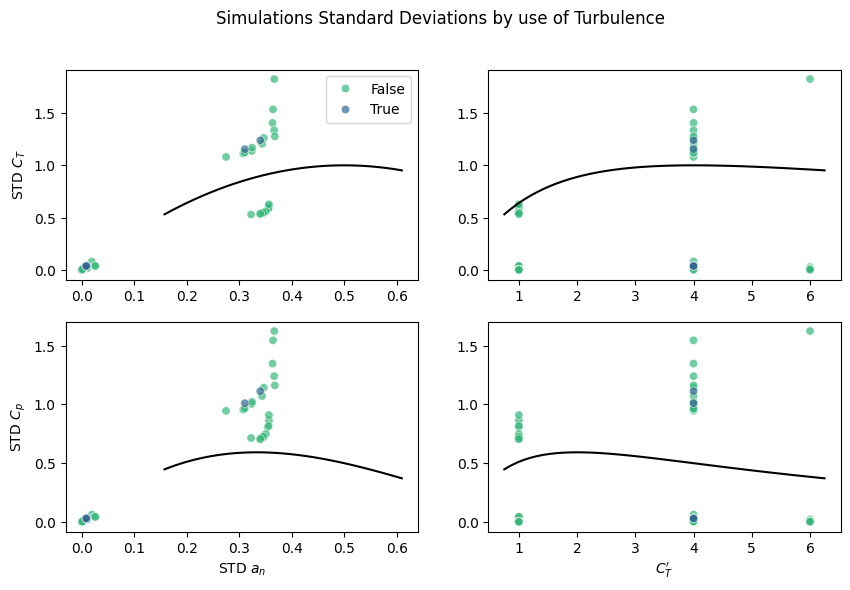

In [399]:
four_plot_layout(df, "std_CT", "std_an", "std_Cp",  title = "Simulations Standard Deviations by use of Turbulence", ax_label_type = "STD", hue = "turbulence", palette = palette, alpha = alpha);

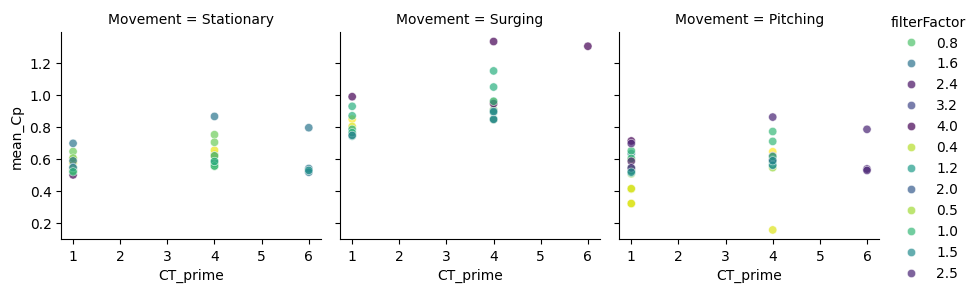

In [400]:
g = sns.FacetGrid(df, col = "Movement")
g.map_dataframe(sns.scatterplot, x = "CT_prime", y = "mean_Cp", hue = "filterFactor", palette = palette, alpha = alpha)
g.add_legend(title = "filterFactor")

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

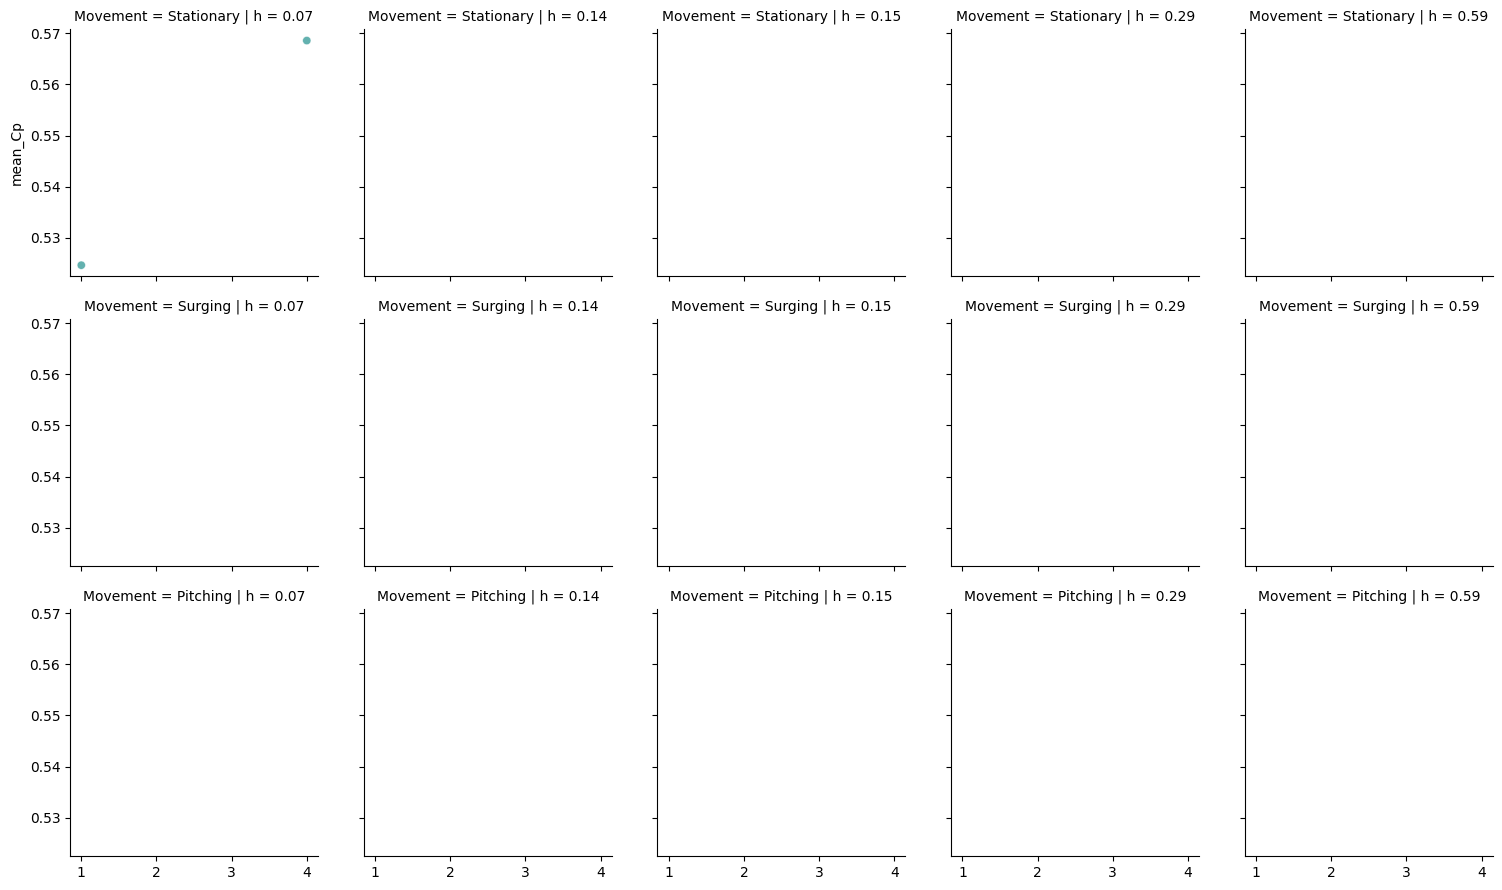

In [401]:
g = sns.FacetGrid(df, col = "h", row = "Movement", hue = "filterFactor")
g.map_dataframe(sns.scatterplot, x = "CT_prime", y = "mean_Cp", hue = "filterFactor", palette = palette, alpha = alpha)

In [ ]:
import seaborn as sns
cm = sns.color_palette("vlag", as_cmap=True)
all_indices = ["Movement", "Resolution (nx, ny, nz)", "filterFactor", "CT_prime", "useCorrection", "turbulence"]
movement_indices = ["Resolution (nx, ny, nz)", "filterFactor", "CT_prime", "useCorrection", "turbulence"]

In [ ]:
# sort categorical data
# df["Resolution (ny)"] = pd.Categorical(df["Resolution (ny)"], natural_sort(df["Resolution (ny)"].unique()))
# df['marker'] = pd.Categorical(df['marker'], ["o", "^", "s"])
# df = df.sort_values(['marker', 'CT_prime', "Resolution (ny)", 'filterFactor', "turbulence", "h"], ascending=[True, True, True, True, True, False])

In [ ]:
df = df[(df["nx"] > 128) & (df["CT_prime"] < 6)]
df = df[(df["CT_prime"] == 4)]
df_ff1_cf = df[(df['filterFactor'] == 1.0) & (df['useCorrection'] == False)]
df_ff2_cf = df[(df['filterFactor'] == 2.5) & (df['useCorrection'] == False)]
df_ff3_ct = df[(df['filterFactor'] == 1.5) & (df['useCorrection'] == True)]
df = pd.concat([df_ff1_cf, df_ff2_cf, df_ff3_ct], axis = 0)

## Mean ($C_T' = 4.0$)

In [ ]:
indexed_mean_df = mean_df.set_index(all_indices)
indexed_mean_df

In [ ]:
stationary_df = mean_df[mean_df["Movement"] == "Stationary"]
stationary_df = stationary_df.set_index(movement_indices)
stationary_df.style.background_gradient(cmap=cm, subset = ["mean_Cp"])

In [ ]:
surging_df = mean_df[mean_df["Movement"] == "Surging"]
surging_df = surging_df.set_index(movement_indices)
surging_df.style.background_gradient(cmap=cm, subset = ["mean_Cp"])

In [ ]:
pitching_df = mean_df[mean_df["Movement"] == "Pitching"]
pitching_df = pitching_df.set_index(movement_indices)
pitching_df.style.background_gradient(cmap=cm, subset = ["mean_Cp"])

## STD ($C_T' = 4.0$)

In [ ]:
indexed_std_df = std_df.set_index(all_indices)
indexed_std_df.style.background_gradient(cmap=cm, subset = ["std_Cp"])

In [ ]:
stationary_df = std_df[std_df["Movement"] == "Stationary"]
stationary_df = stationary_df.set_index(movement_indices)
stationary_df.style.background_gradient(cmap=cm, subset = ["std_Cp"])

In [ ]:
surging_df = std_df[std_df["Movement"] == "Surging"]
surging_df = surging_df.set_index(movement_indices)
surging_df.style.background_gradient(cmap=cm, subset = ["std_Cp"])

In [ ]:
pitching_df = std_df[std_df["Movement"] == "Pitching"]
pitching_df = pitching_df.set_index(movement_indices)
pitching_df.style.background_gradient(cmap=cm, subset = ["std_Cp"])

## Skew ($C_T' = 4.0$)

In [ ]:
indexed_skew_df = skew_df.set_index(all_indices)
indexed_skew_df.style.background_gradient(cmap=cm, subset = ["skewness_Cp"])

In [ ]:
surging_df = skew_df[skew_df["Movement"] == "Surging"]
surging_df = surging_df.set_index(movement_indices)
surging_df.style.background_gradient(cmap=cm, subset = ["skewness_Cp"])

In [ ]:
pitching_df = skew_df[skew_df["Movement"] == "Pitching"]
pitching_df = pitching_df.set_index(movement_indices)
pitching_df.style.background_gradient(cmap=cm, subset = ["skewness_Cp"])

## Kurtosis ($C_T' = 4.0$)

In [ ]:
indexed_kurtosis_df = kurtosis_df.set_index(all_indices)
indexed_kurtosis_df.style.background_gradient(cmap=cm, subset = ["kurtosis_Cp"])

In [ ]:
surging_df = kurtosis_df[kurtosis_df["Movement"] == "Surging"]
surging_df = surging_df.set_index(movement_indices)
surging_df.style.background_gradient(cmap=cm, subset = ["kurtosis_Cp"])

In [ ]:
pitching_df = kurtosis_df[kurtosis_df["Movement"] == "Pitching"]
pitching_df = pitching_df.set_index(movement_indices)
pitching_df.style.background_gradient(cmap=cm, subset = ["kurtosis_Cp"])